/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

(None, 54, 54, 64)
(None, 27, 27, 128)
(None, 27, 27, 128)
(None, 27, 27, 128)
(None, 27, 27, 128)
(None, 27, 27, 128)
(None, 14, 14, 256)
(None, 14, 14, 256)
(None, 14, 14, 256)
(None, 14, 14, 256)
(None, 7, 7, 512)
(None, 7, 7, 512)
(None, 7, 7, 512)
(None, 7, 7, 512)
(None, 3, 3, 512)
(None, 4608)
(None, 4)
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 109, 109, 64  9472        ['input_1[0][0]']                
                                )                                              

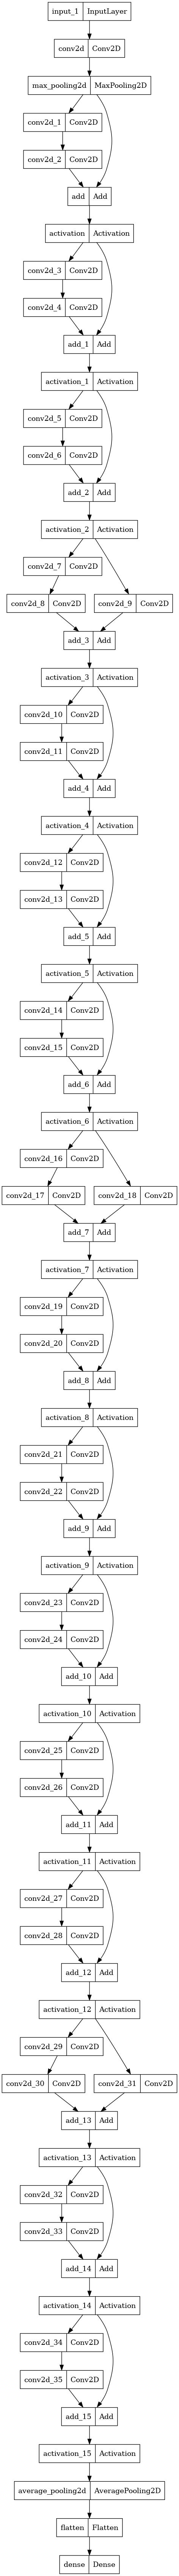

In [1]:
## ResNet Model

import numpy as np 
import pandas as pd 
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, MaxPooling2D, AveragePooling2D, Flatten, Dense,Activation,Concatenate
from tensorflow.keras.models import Model

# Define the input shape
input_shape = (224, 224, 3)

# Define the input tensor
inputs = Input(shape=input_shape)

x = Conv2D(64, (7, 7), strides = (2), activation='relu')(inputs)
x = MaxPooling2D(pool_size=(2, 2))(x)
res = x 

for i in [1,2,3]:
    
    x = Conv2D(64, (3, 3),padding = "same" , activation='relu')(x)

    x = Conv2D(64, (3, 3),padding = "same")(x)

    x = tf.keras.layers.Add()([res, x])
    
    x = Activation('relu')(x)

    res = x
    
x = Conv2D(128, (3, 3), strides = (2),padding = "same", activation='relu')(x)
x = Conv2D(128, (3, 3),padding = "same")(x)
    
print(res.shape)
print(x.shape)

res = Conv2D(128, (1,1), padding = "same", strides = (2))(res)

print(res.shape)
print(x.shape)

x = tf.keras.layers.Add()([res, x])
x = Activation('relu')(x)
res = x

for i in [1,2,3]:
    
    x = Conv2D(128, (3, 3),padding = "same" , activation='relu')(x)

    x = Conv2D(128, (3, 3),padding = "same")(x)

    x = tf.keras.layers.Add()([res, x])
    
    x = Activation('relu')(x)

    res = x
    
print(res.shape)
print(x.shape)

x = Conv2D(256, (3, 3), strides = (2),padding = "same", activation='relu')(x)
x = Conv2D(256, (3, 3),padding = "same")(x)

res = Conv2D(256, (1,1), padding = "same", strides = (2))(res)

print(res.shape)
print(x.shape)

x = tf.keras.layers.Add()([res, x])
x = Activation('relu')(x)
res = x

for i in [1,2,3,4,5]:
    
    x = Conv2D(256, (3, 3),padding = "same" , activation='relu')(x)

    x = Conv2D(256, (3, 3),padding = "same")(x)

    x = tf.keras.layers.Add()([res, x])
    
    x = Activation('relu')(x)

    res = x
    
print(res.shape)
print(x.shape)

x = Conv2D(512, (3, 3), strides = (2),padding = "same", activation='relu')(x)
x = Conv2D(512, (3, 3),padding = "same")(x)

res = Conv2D(512, (1,1), padding = "same", strides = (2))(res)

print(res.shape)
print(x.shape)

x = tf.keras.layers.Add()([res, x])
x = Activation('relu')(x)
res = x

for i in [1,2]:
    
    x = Conv2D(512, (3, 3),padding = "same" , activation='relu')(x)

    x = Conv2D(512, (3, 3),padding = "same")(x)

    x = tf.keras.layers.Add()([res, x])
    
    x = Activation('relu')(x)

    res = x
    
print(res.shape)
print(x.shape)

x = AveragePooling2D(pool_size=(2, 2))(x)

print(x.shape)

x = Flatten()(x)
print(x.shape)

outputs = Dense(4, activation='softmax')(x)
print(outputs.shape)

# Create the model
ResNet_model = Model(inputs=inputs, outputs=outputs)

# Compile the model
ResNet_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Print the summary of the model
ResNet_model.summary()

tf.keras.utils.plot_model( ResNet_model , to_file="ResNet_model.png",  show_shapes=False,show_dtype=False,show_layer_names=True )


In [2]:
# Training With Mri Alzheimer Dataset

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import glob
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
image = cv2.imread('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/non_1002.jpg')
image.shape

(128, 128, 3)

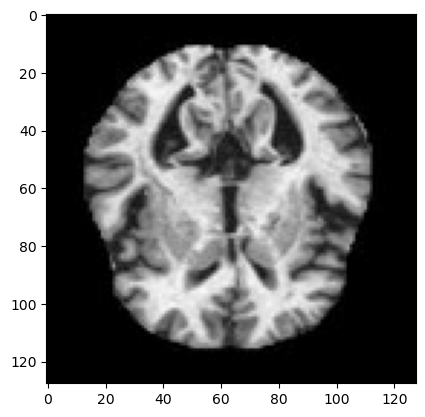

In [4]:
plt.imshow(image)

In [5]:
import glob
import librosa
import numpy as np
import cv2 

Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Mild_Demented/*.jpg')
Moderate_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Moderate_Demented/*.jpg')
Non_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Non_Demented/*.jpg')
Very_Mild_Demented = glob.glob('/kaggle/input/alzheimer-mri-dataset/Dataset/Very_Mild_Demented/*.jpg')


data = []
labels = []

image_size=(224,224)

for i in Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(0)

for i in Moderate_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)
    
    data.append(image)
    labels.append(1)
    
for i in Non_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)
    
    data.append(image)
    labels.append(2)
    
for i in Very_Mild_Demented:   
    image = cv2.imread(i)
    # Resize the image
    image = cv2.resize(image, image_size)

    data.append(image)
    labels.append(3)
    
y=np.array(labels)

X=np.array(data)

print(X.shape)
print(y.shape)

(6400, 224, 224, 3)
(6400,)


In [6]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform train-validation split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(X_val.shape)

print(y_train.shape)
print(y_test .shape)
print(y_val .shape)

(4096, 224, 224, 3)
(1280, 224, 224, 3)
(1024, 224, 224, 3)
(4096,)
(1280,)
(1024,)


Epoch 1/10
128/128 [==============================] - 33s 95ms/step - loss: 2602.3542 - accuracy: 0.4729 - val_loss: 1.0123 - val_accuracy: 0.5117
Epoch 2/10
128/128 [==============================] - 12s 92ms/step - loss: 1.0463 - accuracy: 0.4998 - val_loss: 0.9862 - val_accuracy: 0.5332
Epoch 3/10
128/128 [==============================] - 12s 92ms/step - loss: 1.0141 - accuracy: 0.5081 - val_loss: 0.9499 - val_accuracy: 0.5420
Epoch 4/10
128/128 [==============================] - 11s 89ms/step - loss: 0.9726 - accuracy: 0.5303 - val_loss: 0.8883 - val_accuracy: 0.5615
Epoch 5/10
128/128 [==============================] - 12s 92ms/step - loss: 0.9426 - accuracy: 0.5344 - val_loss: 0.9003 - val_accuracy: 0.5508
Epoch 6/10
128/128 [==============================] - 12s 93ms/step - loss: 0.8840 - accuracy: 0.5808 - val_loss: 0.8214 - val_accuracy: 0.5938
Epoch 7/10
128/128 [==============================] - 11s 89ms/step - loss: 0.8024 - accuracy: 0.6355 - val_loss: 0.8099 - val_accura

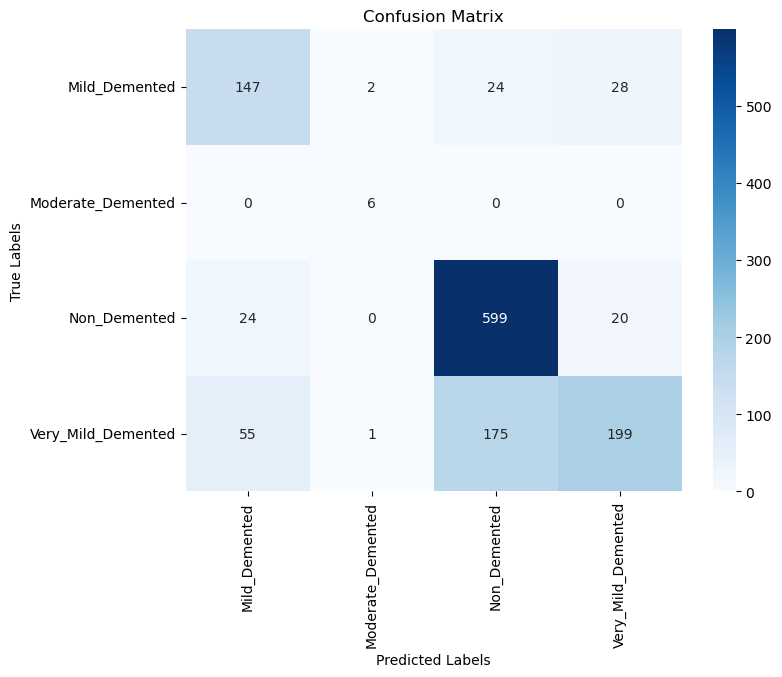

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


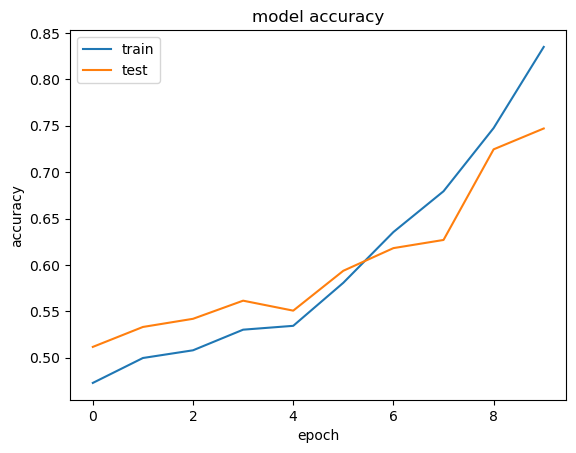

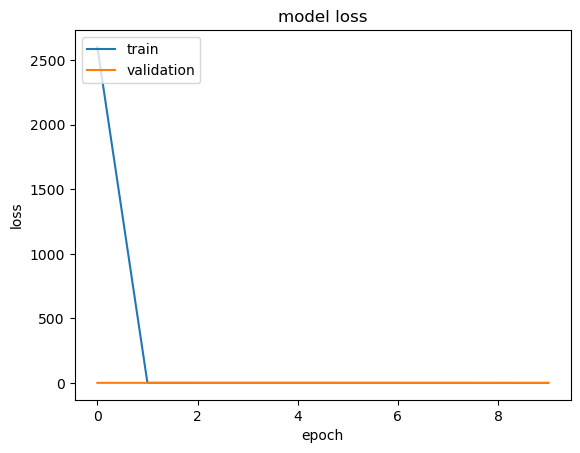

In [7]:
# Train with ResNet

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

history = ResNet_model.fit(X_train,y_train,validation_data=(X_val,y_val),epochs=10, batch_size=32)
     
predictions = ResNet_model.predict(X_test)
predicted_classes = np.argmax(predictions, axis=1)

# Generate the classification report
class_names = list(['Mild_Demented','Moderate_Demented','Non_Demented','Very_Mild_Demented'])
report = classification_report(y_test, predicted_classes , target_names = class_names)
print("Classification Report:\n", report)

# Generate the confusion matrix
cm = confusion_matrix(y_test, predicted_classes )
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print(history.history.keys())

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
